# Latar Belakang

Taksi menjadi salah satu transportasi umum yang paling diminati oleh masyarakat perkotaan. Oleh karenanya, Operasi layanan taksi dan regulator transportasi akan melakukan analisis terkait pola mobilisasi masyarakat dari data perjalanan taksi guna peningkatan layanan dan sistem operasi. Selain itu, analisis ini juga dapat memberikan pemahaman pola pergerakan dan efisiensi layanan kepada masyarakat luas.

Data perjalanan taksi tidak hanya menyajikan informasi durasi perjalanan,total biaya, lokasi penjemputan dan pengantaran, namun juga memuat jumlah penumpang, jarak tempuh, metode pembayaran, hingga tip yang diberikan. Analisis dapat dilakukan dari pola waktu tersibuk, lokasi yang paling sering digunakan, serta hubungan jarak terhadap biaya dan perilaku tip.Visualisasi yang tepat akan memberikan gambaran yang komprehensif dan berbasis data mengenai operasional dan perilaku penggunan layanan taksi di New York City.

# Rumusan Masalah

1. Kapan waktu tersibuk berdasarkan jam dan hari dalam seminggu?
2. Dimana lokasi yang paling banyak menggunakan layanan taksi?
4. Apakah jarak tempuh mempengaruhi total biaya perjalanan dan perilaku tip?

# Import Libraries

In [2]:
%pip install plotly.express

  Obtaining dependency information for plotly.express from https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for plotly>=4.1.0 from https://files.pythonhosted.org/packages/bf/6f/759d5da0517547a5d38aabf05d04d9f8adf83391d2c7fc33f904417d3ba2/plotly-6.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for narwhals>=1.15.1 from https://files.pythonhosted.org/packages/79/3f/8d450588206b437dd239a6d44230c63095e71135bd95d5a74347d07adbd5/narwhals-1.42.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
   ----------------

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Data

Dataset berikut berisi informasi mengenai data perjalanan taksi yang terekam oleh jasa penyedia layanan data yang meliputi:
* VendorID: kode layanan yang menyediakan data rekaman, dimana,
 1 = Creative Mobile Technologies, LLC
 2 = VerlFone Inc.
* lpep_pickup_datetime: waktu dan tanggal ketika meteran dinyalakan.
* lpep_dropoff_datetime: waktu dan tanggal ketika meteran dimatikan.
* Passenger_count: jumlah penumpang didalam kendaraan termasuk pengemudi.
* Trip_distance: jarak perjalanan yang telah dilalui yang direkam oleh taximeter.
* PULocationID: ZOna taksi TLC dimana taximeter dinyalakan.
* DULocationID: zona taksi TLC dimana taximeter dimatikan.
* RateCodeID: kode tarif akhir yang berlaku diakhir perjalanan
 1 = standard rate,
 2 = JFK,
 3 = Newark,
 4 = Nassau atau Westchester,
 5 = Ongkos dinegosiasikan,
 6 = perjalanan berkelompok
* Store_and_fwd_flag: mengindikasikan apakah rekaman perjalanan terjadi didalam memori kendaraan sebelum mengirim ke vendor, alias "store and forward" karena kendaraan tidak punya koneksi ke server.
 Y = store and forward trip,
 N = bukan store and forward trip
* Payment_type: kode numerik yang menandai bagaimana penumpang membayar perjalanan
 1 = kartu kredit,
 2 = tunai,
 3 = tidak membayar,
 4 = dispute,
 5 = tidak diketahui,
 6 = perjalanan volded
* Fare amount: tarif jarak dan waktu yang dikalkulasi oleh meteran. Tambahan biaya tambahan dna biaya lainnya. Saat ini, hanya mencakup biaya sebesar $0,50 dan $1 pada jam sibuk dan biaya semalaman.
* MTA_tax: pajak MTA $0,50 yang secara otomatis terpicu berdasarkan tarif meteran yang digunakan.
* improvement_surcharge: biaya perbaikan sebesar $0,30 dibebankan pada perjalanan yang diberangkatkan pada saat bendera diturunkan. Biaya perbaikan mulai dikenakan pada tahun 2015.
* Tip_amount: kolom ini diisi secara otomatis untuk tips kartu kredit. Tips tunai tidak termasuk.
* Tolls_amount: jumlah total semua tol yang dibayarkan selama perjalanan.
* Total_amount: jumlah total yang dibebankan ke penumpang, tidak termasuk tip.
* Trip_type: suatu kode yang mengindikasikan apakah perjalanan tersebut merupakan perjalanan singkat atau perjalanan yang ditetapkan secara otomatis berdasarkan tarif meteran yang digunakan tetapi dapat diubah oleh pengemudi.


In [112]:
dataset = pd.read_csv("NYC TLC Trip Record.csv")
dataset

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [113]:
display(dataset.head(),dataset.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


# Data Understanding and Cleaning

Sebelum melakukan pengolahan data ada baiknya dikenali terlebih dahulu jenis, isi, dan kualitas data yang akan dianalisis. Tahap ini disebut 'data understanding' dimana bertujuan untuk mengetahui apakah perlu diberikan perlakuan atau penyesuaian tertentu terhadap data-data tersebut agar tidak terjadi kesalahan pada hasil yang dapat disebabkan oleh kehadiran missing data, noise, dan sebagainya. Apabila ditemukan data yang tidak relevan, tidak akurat, maupun rusak  yangmana  diperkirakan akan berpengaruh terhadap hasil maka perlu dilakukan 'data cleaning'.

In [114]:
print(f'Jumlah baris dan kolom di dataset adalah {dataset.shape}')
dataset.info()

Jumlah baris dan kolom di dataset adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  e

In [115]:
display(dataset.describe(), dataset.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [116]:
# Tampilkan seluruh isi kolom meskipun panjang
pd.set_option('display.max_colwidth', None)

# Membuat list informasi kolom
listItem = []
for col in dataset.columns:
    listItem.append([
        col,
        dataset[col].nunique(),
        dataset[col].unique()[:10]  # hanya tampilkan 10 nilai unik pertama agar tidak terlalu panjang
    ])

# Buat DataFrame ringkasan
tabel1Desc = pd.DataFrame(
    columns=['Column Name', 'Number of Unique', 'Unique Sample'],
    data=listItem
)

# Tampilkan hasil
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42]"
3,store_and_fwd_flag,2,"[N, Y, nan]"
4,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83]"
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140]"
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]"
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22]"
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8]"


Berdasarkan informasi diatas, dapat dinyatakan bahwa:
* Kolom store_and fwd_flag, RatecodeID, total_amount, payment_type, trip_type, dan congestion_surcharge memiliki data kosong yang ditunjukkan oleh data NaN.
* Kolom ehail_fee tidak memiliki nilai, sehingga tidak dapat digunakan dalam analisis dan lebih baik dihapus.
* Kolom passenger_count bertipe float, karena ini menunjukkan jumlah penumpang maka lebih baik diubah ke bentuk integer.
* Terdapat nilai 0 pada data trip_distance. Apakah mungkin perjalanan memiliki jarak 0,0 miles? Lebih baik diterapkan filter pada data lebih kecil atau sama dengan 0,0 miles.
* Analisis ini hanya akan berfokus pada waktu tersibuk, lokasi terpadat, dan hubungan jarak terhadap biaya dan perilaku tip, sehingga beberapa kolom yang tidak berpengaruh atau tidak diperlukan akan dihapus, seperti 'store_and_fwd_flag' dan 'RatecodeID'.

In [117]:
# Menghapus kolom yang tidak diperlukan
dataset_clean = dataset.drop(columns=['store_and_fwd_flag', 'ehail_fee', 'RatecodeID'])
dataset_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [118]:
# mengubah tipe data 'paseenger_count' 
# dataset_taxi = dataset_clean.copy()
# dataset_taxi['VendorID'] = dataset_taxi['VendorID'].astype('str')
# dataset_taxi['RatecodeID'] = dataset_taxi['RatecodeID'].astype('str')
# dataset_taxi['lpep_dropoff_datetime'] = dataset_taxi['lpep_dropoff_datetime'].astype('datetime64[ns]')
# dataset_taxi['PULocationID'] = dataset_taxi['PULocationID'].astype('str')
# dataset_taxi['DOLocationID'] = dataset_taxi['DOLocationID'].astype('str')
# dataset_taxi['passenger_count'] = dataset_taxi['passenger_count'].astype('Int64')
# dataset_taxi['trip_type'] = dataset_taxi['trip_type'].astype('str')
# dataset_taxi['payment_type'] = dataset_taxi['payment_type'].astype('str')
# dataset_taxi

In [119]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   PULocationID           68211 non-null  int64  
 4   DOLocationID           68211 non-null  int64  
 5   passenger_count        63887 non-null  float64
 6   trip_distance          68211 non-null  float64
 7   fare_amount            68211 non-null  float64
 8   extra                  68211 non-null  float64
 9   mta_tax                68211 non-null  float64
 10  tip_amount             68211 non-null  float64
 11  tolls_amount           68211 non-null  float64
 12  improvement_surcharge  68211 non-null  float64
 13  total_amount           68211 non-null  float64
 14  payment_type           63887 non-null  float64
 15  tr

In [120]:
# Karena 'passenger_count' merupakan jumlah penumpang dalam satu kali perjalanan sehingga nilai tidak mungkin merupakan bilangan desimal, sehingga perlu diubah tipe datanya dari float ke integer
dataset_clean['passenger_count'] = dataset_clean['passenger_count'].astype('Int64')

### Missing Value

In [121]:
# persentase missing value di tiap kolom
dataset_clean.isna().sum()/dataset_clean.shape[0]*100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             6.339154
trip_type                6.353814
congestion_surcharge     6.339154
dtype: float64

<Axes: >

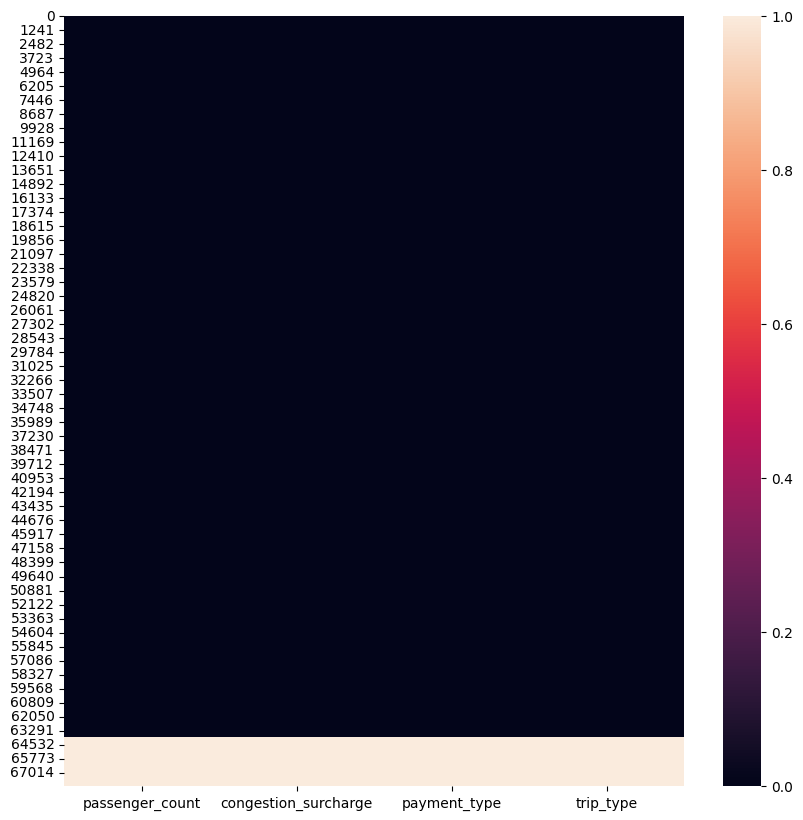

In [122]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(dataset_clean[['passenger_count', 'congestion_surcharge', 'payment_type', 'trip_type']].isna())

Gambar heatmap memperlihatkan area didominasi oleh warna gelap dan hanya sebagian kecil berwarna terang dibagian bawah yang mengindikasikan rasio missing_value yang dimiliki oleh kolom2 tersebut sedikit dibandingkan total keseluruhan baris dan terkonsentrasi di akhir dataset.
* warna gelap/ hitam: tidak ada missing value
* warna terang: ada missing value
* skala warna: tingkat missing_value yang dimiliki, semakin besar atau menuju ke satu menunjukkan tingkat missing value semakin sedikit, begitupula sebaliknya.

Persentase jumlah nilai missing value pada kolom 'passenger_count', 'payment_type', 'trip_type', dan 'congestion_surcharge' cenderung kecil (<10).

In [123]:
# Berapa baris yang memil;ili nilai missing values
dataset_clean[['passenger_count','congestion_surcharge', 'payment_type', 'trip_type']].isna().sum()

passenger_count         4324
congestion_surcharge    4324
payment_type            4324
trip_type               4334
dtype: int64

Pengisian data kosong pada kolom 'payment_type' dan 'trip_type' dapat menggunakan imputasi dari beberapa kategori lainnya. Kedua kolom ini bersifat kategorik dimana solusi pengisian data kosong dapat menggunakan modus (nilai yg paling sering muncul) dan imputasi terhadap kategori lainnya. Pertimbangan menggunakan lebih dari satu kategori karena kemungkinan 'payment_type' dan 'trip_type' dipengaruhi bukan hanya dari satu faktor.

Dalam pengisian missing_value ada beberapa cara yang bisa digunakan tergantung dari tujuan dan konteks datanya. Karena data 'payment_type' dan 'trip_type' ini bersifat kategorik cara pertama yang bisa digunakan adalah mengisi data kosong dengan nilai yang paling sering muncul atau modus. Modus digunakan apabila diindikasi tidak ada korelasi kuat antara kolom yang diidenfikasi terhadap kolom lainnya. Metode kedua adalah mengunakan imputasi dengan kategori lain. Imputasi dilakukan jika kita yakin bahwa ada pengaruh dari data kolom lain terhadap distribusi 'payment type' dan 'trip_type'.

### Pengisian missing value 'payment_type'

In [124]:
# Mengecek proporsi per kategori data dalam kolom 'payment_type
dataset_clean['payment_type'].value_counts(normalize=True)* 100

payment_type
1.0    63.684318
2.0    35.425047
3.0     0.738804
4.0     0.148700
5.0     0.003131
Name: proportion, dtype: float64

In [125]:
# mengubah nama baris atau nilai dalam kolom 'payment_type' menjadi deskripsif masing-masing kode pembayarannya.
payment_type_name= {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown'
}

dataset_clean['payment_type'] = dataset_clean['payment_type'].replace(payment_type_name)

In [126]:
dataset_clean['payment_type'].value_counts()


payment_type
Credit Card    40686
Cash           22632
No Charge        472
Dispute           95
Unknown            2
Name: count, dtype: int64

In [127]:
# Mengubah tipe data 'payment_type' dari integer ke string
dataset_clean['payment_type'] = dataset_clean['payment_type'].astype(str)


Berdasarkan distribusi jenis pembayaran diatas proporsi tertinggi menggunakan tipe pembayaran berupa kartu kredit sebesar 59.83% diikuti oleh pembayaran tunai 33.18%, jenis pembayran tidak diketahui dengan persentase 6.15%, dan sisanya tidak membayar dan 'dispute'. Jenis pembayaran yang dilakukan penumpang taksi bervariasi, sehingga akan dipilih metode pengisian missing value dengan imputasi atau korelasi terhadap kolom data lainnya yang diperkirakan mempunyai pengaruh terhadap jenis pembayaran.

'payment_type':  pengisian data kosong akan dilakukan berdasarkan hubungan terhadap 'VendorID' dan 'trip_distance', dimana diasumsikan kecenderungan jenis pembayaran dan jenis perjalanan dapat disebabkan pada sistem pelayanan yang biasa digunakan oleh satu Vendor dan/atau terhadap jarak perjalanan (semakin jauh perjalanan penumpang memilih membayar menggunakan credit/cash?).

In [128]:
# Membuat kategori trip_distance
def jarak_kategori(x):
    if pd.isna(x):
        return 'unknown'
    elif x < 2:
        return 'dekat'
    elif x < 6:
        return 'sedang'
    else:
        return 'jauh'

dataset_clean['trip_distance_cat'] = dataset_clean['trip_distance'].apply(jarak_kategori)

In [129]:
# membuat kolom kombinasi kategori
dataset_clean['group_key'] = dataset_clean['VendorID'].astype(str) + "_" + \
                       dataset_clean['trip_type'].astype(str) + "_" + \
                       dataset_clean['trip_distance_cat']

In [130]:
# imputasi 'payment_type' berdasarkan group_key
dataset_clean['payment_type'] = dataset_clean.groupby('group_key')['payment_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

### Pengisian missing value 'trip_type'

In [131]:
# mengubah nama baris atau nilai dalam kolom 'trip_type' menjadi deskripsif masing-masing kode pembayarannya.
trip_type_name= {
    1: 'Street Hall',
    2: 'Dispatch',
}

dataset_clean['trip_type'] = dataset_clean['trip_type'].replace(trip_type_name)

In [132]:
dataset_clean['trip_type'].value_counts()

trip_type
Street Hall    62476
Dispatch        1401
Name: count, dtype: int64

In [133]:
# Mengubah tipe data 'trip_type' dari integer ke string
dataset_clean['trip_type'] = dataset_clean['trip_type'].astype(str)

In [134]:
# mengecek isi kolom 'trip_type
dataset_clean['trip_type'].value_counts(dropna=False)

trip_type
Street Hall    62476
nan             4334
Dispatch        1401
Name: count, dtype: int64

In [135]:
# Mengecek proporsi per kategori data dalam kolom 'trip_type
dataset_clean['trip_type'].value_counts(normalize=True)* 100

trip_type
Street Hall    91.592265
nan             6.353814
Dispatch        2.053921
Name: proportion, dtype: float64


Distribusi perkategori diatas menunjukkan bahwa mayoritas data memiliki nilai trip_type berupa 'street hall' dengan persentase hampir mencapai 98%, maka cara terbaik dan paling efisien adalah mengisi missing value dengan nilai jenis perjalanan yang paling sering dipilih yaitu 'street hall'.

In [136]:
# Hitung modus
mode_trip_type = dataset_clean['trip_type'].mode()[0]

# Isi missing value dengan modus
dataset_clean['trip_type'] = dataset_clean['trip_type'].fillna(mode_trip_type)

### Pengisian missing value 'congestion_surcharge'

Kolom 'congestion_surcharge' merupakan data numerik diskrit (integer). Metode pengisian missing value yang umum digunakan untuk tipe data ini adalah menggunakan median, modus, atau imputasi dengan kategori lainnya. Median dipilih ketika data menyebar dan memiilki outlier dengan kata lain akan meminimalisir pengaruh dari data outlier dengan menjaga kestabilan nilai tengah. Modus digunakan apabila ada kecenderungan tinggi pada nilai tertentu. Dan Imputasi dipakai jika dirasa ada pengaruh terhadap jenis kategori lainnya.

Diasumsikan bahwa nilai pada kolom 'congestion_surcharge' dipengaruhi oleh beberapa kategori seperti lokasi penjemputan, lokasi pengantaran, waktu, jenis perjalanan, dan jarak. Maka pengisian data kosong dilakukan dengan imputasi hubungan antar beberapa kategori ini.

1. Ekraksi Kolom 'hour

Tujuan: Mengetahui jam dari waktu penjemputan di kolom 'lpep_pickup_datetime' karena surcharge bisa bergantung pada jam sibuk atau tidak.

In [137]:
# Membuat kolom 'hour' dari kolom 'pickup_datetime
dataset_clean['hour'] = pd.to_datetime(dataset_clean['lpep_pickup_datetime']).dt.hour
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   PULocationID           68211 non-null  int64  
 4   DOLocationID           68211 non-null  int64  
 5   passenger_count        63887 non-null  Int64  
 6   trip_distance          68211 non-null  float64
 7   fare_amount            68211 non-null  float64
 8   extra                  68211 non-null  float64
 9   mta_tax                68211 non-null  float64
 10  tip_amount             68211 non-null  float64
 11  tolls_amount           68211 non-null  float64
 12  improvement_surcharge  68211 non-null  float64
 13  total_amount           68211 non-null  float64
 14  payment_type           68211 non-null  object 
 15  tr

2. Membuat kategori jarak perjalanan

Tujuan: Mengelompokkan jarak perjalanan berdasarkan rentangnya (misal: dekatk, sedang, jauh) agar imputasi lebih kontekstual dan tidak terlalu spesifik.

In [138]:
# Membuat kategori trip_distance
def jarak_kategori(x):
    if pd.isna(x):
        return 'unknown'
    elif x < 2:
        return 'dekat'
    elif x < 6:
        return 'sedang'
    else:
        return 'jauh'

dataset_clean['trip_distance_cat'] = dataset_clean['trip_distance'].apply(jarak_kategori)

3. Membuat Kolom 'group_key'

Tujuan: Menggabungkan semua kategori yang diidentifikasi memengaruhi 'congestion_surcharge' ke dalam satu kunci unik sebagai dasar pengelompokan.

In [139]:
dataset_clean['group_key'] = dataset_clean['PULocationID'].astype(str) + "_" + \
                       dataset_clean['DOLocationID'].astype(str) + "_" + \
                       dataset_clean['hour'].astype(str) + "_" + \
                       dataset_clean['trip_distance_cat'].astype(str)

4. Menghitung Median berdasarkan 'group_key'

Tujuan: Menentukan nilai imputasi spesifik berdasarkan kombinasi karakteristik perjalanan.

In [140]:
group_medians = dataset_clean.groupby('group_key')['congestion_surcharge'].median()

5. Membuat fungsi imputasi

Tujuan: Mengisi NaN di kolom 'congestion_surcharge' denagn nilai median dari kelompoknya.

In [141]:
def impute_surcharge(row):
    if pd.isna(row['congestion_surcharge']):
        key = f"{row['PULocationID']}_{row['DOLocationID']}_{row['hour']}_{row['trip_distance_cat']}_{row['trip_type']}"
        if key in group_medians:
            return group_medians[key]
        else:
            return dataset_clean['congestion_surcharge'].median()  # fallback
    else:
        return row['congestion_surcharge']


6. Menerapkan fungsi imputasi ke dataset

In [142]:
dataset_clean['congestion_surcharge'] = dataset_clean.apply(impute_surcharge, axis=1)

7. Validasi hasil

In [143]:
dataset_clean.isna().sum()/dataset_clean.shape[0]*100

VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.000000
trip_type                0.000000
congestion_surcharge     0.000000
trip_distance_cat        0.000000
group_key                0.000000
hour                     0.000000
dtype: float64

### Pengisian missing value kolom 'passenger_count'

Sama halnya dengan dataset 'congestion_surcharge', kolom 'passenger_count' adalah data numerik diskrit (integer).

Diasumsikan bahwa nilai pada kolom 'passeneger_count' dipengaruhi oleh beberapa kategori seperti lokasi penjemputan, lokasi pengantaran, waktu, jenis perjalanan, dan jarak. Maka pengisian data kosong dilakukan dengan imputasi hubungan antar beberapa kategori ini.

In [144]:
# Mengecek isi kolom 'passenger_count'
dataset_clean['passenger_count'].value_counts()

passenger_count
1    54299
2     5096
5     1772
6     1054
3      958
4      364
0      336
7        4
9        2
8        2
Name: count, dtype: Int64

In [145]:
# Mengecek proporsi per kategori data dalam kolom 'trip_type
dataset_clean['passenger_count'].value_counts(normalize=True)* 100

passenger_count
1    84.992252
2     7.976584
5     2.773647
6     1.649788
3     1.499523
4     0.569756
0     0.525929
7     0.006261
9     0.003131
8     0.003131
Name: proportion, dtype: Float64

1. Membuat kolom 'group_key'

In [146]:
group_key = ['PULocationID', 'DOLocationID', 'hour']

2. Menghitung modus pada kombinasi kategori yang akan digunakan

In [148]:
def safe_mode(series):
    mode_val = series.mode()
    if not mode_val.empty:
        return mode_val.iloc[0]
    else:
        return np.nan  # atau bisa pakai nilai fallback

In [149]:
group_modes = dataset_clean.groupby(group_key)['passenger_count'].agg(safe_mode)

3. Membuat fungsi imputasi

In [150]:
def impute_passenger_mode(row):
    if pd.isna(row['passenger_count']):
        key = tuple(row[col] for col in group_key)
        if key in group_modes:
            val = group_modes[key]
            return val if not pd.isna(val) else dataset['passenger_count'].mode()[0]
        else:
            return dataset['passenger_count'].mode()[0]  # fallback
    else:
        return row['passenger_count']

4. Menerapkan fungsi imputasi ke dataset

In [151]:
dataset_clean['passenger_count'] = dataset_clean.apply(impute_passenger_mode, axis=1)


5. Validasi hasil

In [152]:
dataset_clean.isna().sum()/dataset_clean.shape[0]*100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
trip_distance_cat        0.0
group_key                0.0
hour                     0.0
dtype: float64

# Pengecekan data cleaned

In [160]:
listItem = []
for col in dataset_clean.columns :
    listItem.append([col, dataset_clean[col].dtype, dataset_clean[col].isna().sum(),
                    dataset_clean[col].nunique(), list(dataset_clean[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(dataset_clean.shape)
dfDesc

(68211, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,66575,"[2023-01-11T18:42:59.000000000, 2023-01-25T20:52:21.000000000]"
2,lpep_dropoff_datetime,object,0,66519,"[2023-01-22 06:20:02, 2023-01-09 14:43:17]"
3,PULocationID,int64,0,226,"[69, 245]"
4,DOLocationID,int64,0,249,"[193, 7]"
5,passenger_count,float64,0,10,"[8.0, 4.0]"
6,trip_distance,float64,0,1870,"[23.58, 6.7]"
7,fare_amount,float64,0,2553,"[31.77, 15.56]"
8,extra,float64,0,16,"[3.25, -1.0]"
9,mta_tax,float64,0,6,"[-0.5, 0.5]"


Jumlah data yang dimiliki sama sebelum dan sesudah data cleaning karena kita tidak melakukan penghapusan data, sedangkan untuk kolomnya kita menghapus tiga kolom ('Store_and_fwd_flag', 'RatecodeID', dan 'ehail_fee'), kemudian menambah tiga kolom baru juga untuk memudahkan dalam pembuatan kategori imputasi yaitu 'trip_distance_cat', 'group_key', dan 'hour'.

# Data Analysis

Parameter yang dibutuhkan untuk analisis data sudah terpenuhi. Selanjutnya menganalisis data yang sudah bersih dan siap tersebut untuk memperoleh informasi perilaku konsumen terhadap penggunaan jasa layanan taksi di Kota New York. Hasil analisis dapat menjadi dasar untuk meningkatkan layanan transportasi taksi sesuai kebutuhan masyarakat. 
Analisis akan dilakukan dengan tiga target utama yaitu mengamati waktu tersibuk, lokasi paling banyak digunakan, dan pengaruh jarak terhadap total biaya dan perilaku tip. Melalui ketiga parameter utama ini nantinya dapat diajukan beberapa saran seperti mungkin perlu meningkatkan jumlah taksi yang beroperasi pada waktu tertentu atau pada lokasi tertentu. Apakah total biaya dan perilaku tip berbanding lurus terhadap jarak, atau terdapat anomali tertentu, jika tidak dapat dianalisis apa kemungkinan penyebabnya.

## 1. Total Perjalanan per Jam

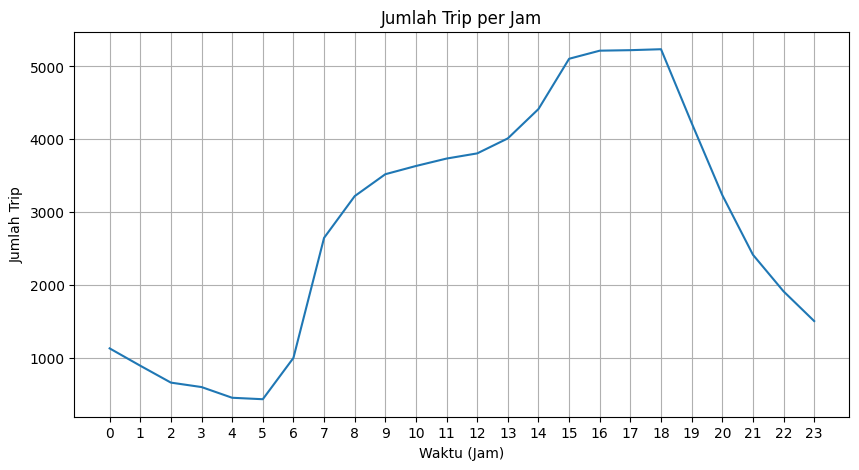

In [349]:
dataset_clean['lpep_pickup_datetime'] = pd.to_datetime(dataset_clean['lpep_pickup_datetime'])
dataset_clean['hour'] = dataset_clean['lpep_pickup_datetime'].dt.hour

trip_hour = dataset_clean.groupby('hour').size()

plt.figure(figsize=(10,5))
sb.lineplot(x=trip_hour.index, y=trip_hour.values)
plt.title('Jumlah Trip per Jam')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Jumlah Trip')
plt.xticks(ticks=range(0, 24, 1)) # Atur sumbu X naik +1
plt.grid(True)
plt.show()

### Interpretasi

Dari grafik garis diatas, diperoleh:

* Jumlah perjalanan taksi cenderung menurun dari pukul 12 malam menuju 5 pagi, menunjukkan aktivitas mobilisasi masyarakat pengguna taksi rendah pada waktu tersebut.
* Dari jam 5 pagi terjadi peningkatan signifikan jumlah perjalanan taksi, naik tajam dari pukul 14.00 dengan jumlah perjalanan mencapai kurang lebih 4000 perjalanan, hingga mencapai puncaknya dari pukul 15.00 - 18.00.  Pada kisaran jam tersebut berkorelasi dengan aktivitas masyarakat seperti jam pulang sekolah dan kerja.
* Setelah pukul 18.00 jumlah perjalanan terus menurun seiring bertambahnya jam.
Grafik diatas menunjukkan bahwa pola perjalanan taksi sangat dipengaruhi oleh aktivitas masyarakat seperti aktivitas kerja, sekolah, dan mobilitas harian lainnya. Sedangkan jumlah operasi taksi rendah berapa pada waktu malam hingga dini hari, pada rentang waktu ini merupakan waktu masyarakat beristirahat.

## 2. Jumlah Perjalanan perjam dalam satu hari, selama seminggu

Tujuan: Mengetahui Jumlah perjalanan perjam dalam satu hari, selama seminggu penuh.

### Membuat kolom jam dan hari

In [159]:
# Pastikan datetime sudah dalam format datetime
dataset_clean['lpep_pickup_datetime'] = pd.to_datetime(dataset_clean['lpep_pickup_datetime'])

# Ekstrak hari dan jam
dataset_clean['hour'] = dataset_clean['lpep_pickup_datetime'].dt.hour
dataset_clean['weekday'] = dataset_clean['lpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# (Opsional) Nama hari untuk tampilan
weekday_map = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
dataset_clean['weekday_name'] = dataset_clean['weekday'].map(weekday_map)

In [161]:
heatmap_data = dataset_clean.groupby(['weekday_name', 'hour']).size().unstack(fill_value=0)

# Urutkan hari secara manual (karena default-nya alfabet)
order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
heatmap_data = heatmap_data.loc[order]

### Plot Heatmap

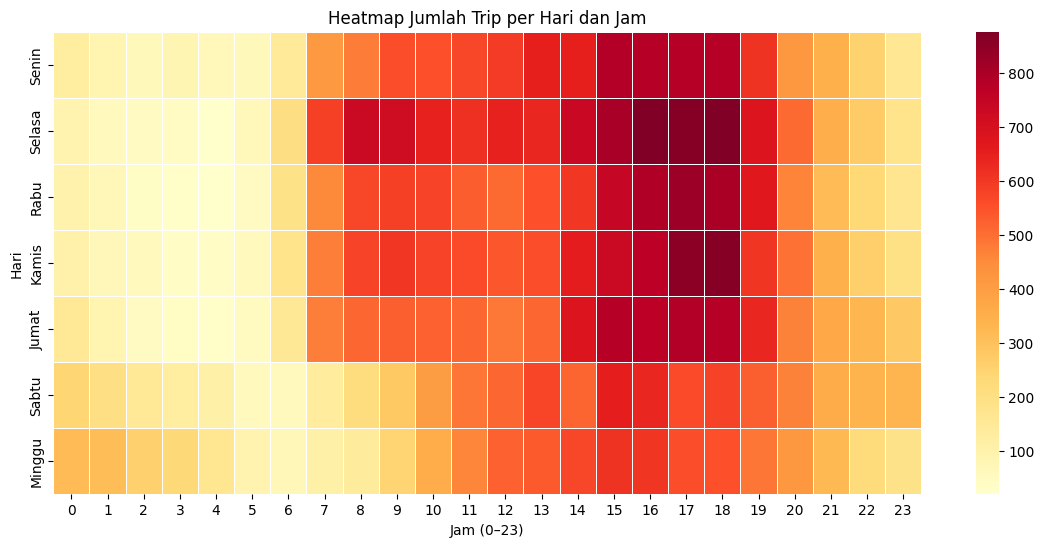

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=.5, annot=False)

plt.title('Heatmap Jumlah Trip per Hari dan Jam')
plt.xlabel('Jam (0–23)')
plt.ylabel('Hari')
plt.show()

### Interpretasi

Skala warna pada heatmap diatas terlihat bahwa:

* Terlihat pola perjalanan yang sedikit berbeda antara hari kerja (Senin - Jumat) dengan akhir pekan (Sabtu - Minggu). Nilai rendah ditunjukkan oleh skala warna kuning dan semakin merah merupakan peningkatan aktivitas perjalanan taksi.
* Jumlah perjalanan di hari kerja tepatnya pada pukul 00.00 - 5.00 sangat rendah dan mulai mengalamai peningkatan pada pukul 6.00, semakin tinggi menuju pukul 7.00 dan puncaknya pukul 13.30 - 18.30 merupakan waktu dimana tingginya mobilisasi masyarakat seperti jam murid-murid pulang sekolah dan kerja. Jumlah menurun setelah jam tersebut hingga tengah malam.
* Jumlah aktivitas operasi taksi ditengah malam sedikit lebih tinggi dibandingkan pada hari kerja,kemudian diikuti penurunan dari mulai pukul 3.00 - 6.30 pagi, dan pola kenaikan mengikuti pada hari kerja namun tidak setinggi pada hari kerja. Hal ini mengindikasikan bahwa pola mobilisasi masyarakat bervariasi pada akhir pekan. Puncak operasional taksi tidak setinggi pada hari kerja menandakan bahwa aktivitas berkurang dengan adanya hari libur dimana sebagian orang lebih memilih tidak melakukan aktivitas diluar dan tidak menggunakan layanan taksi. 

# 3. Rata-rata jumlah penumpang/jam dalam seharinya, kurun waktu seminggu

Tujuan:
Mengetahui rata-rata penumpang setiap jamnya dalam sehari selama seminggu dari Senin - Minggu.

In [163]:
avg_passenger = dataset_clean.groupby(['weekday_name', 'hour'])['passenger_count'].mean().reset_index()


In [176]:
heatmap_data = avg_passenger.pivot(index='weekday_name', columns='hour', values='passenger_count')

# Urutkan hari agar tidak acak
order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
heatmap_data = heatmap_data.reindex(order[::-1])


### Plot Heatmap

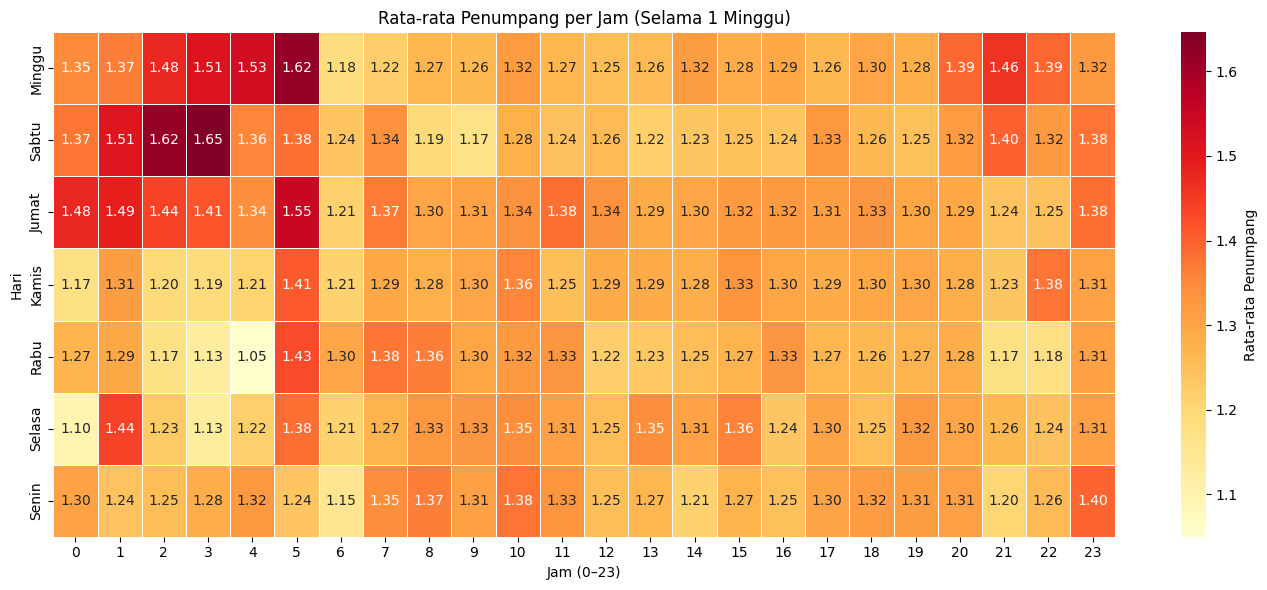

In [178]:


plt.figure(figsize=(14, 6))
sb.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=0.4, cbar_kws={'label': 'Rata-rata Penumpang'})

plt.title('Rata-rata Penumpang per Jam (Selama 1 Minggu)')
plt.xlabel('Jam (0–23)')
plt.ylabel('Hari')
plt.tight_layout()
plt.show()


### Interpretasi

Rata-rata penumpang sebagiaman ditampilkan pada heatmap diatas adalah:

* Pola perjalanan pada pagi hari sekitar pukul 7.00 - 9.00 menunjukkan kenaikan rata-rata penumpang, terutama pada hari kerja (Senin - Jumat). Ini kemungkinan berkaitan dengan aktivitas berangkat kerja atau sekolah.
* Pola kembali naik pada siang hari menuju sore hari yang mengindikasikan waktu pulang sekolah dan kerja, dengan jumlah penumpang yang cukup tinggi dan stabil.
* Akhir pekan (Sabtu - Minggu) memiliki pola operasional taksi yang sedikit berbeda. Jumlah penumpang cenderung tinggi di tengah malam menuju dini hari dan lebih rendah di siang hari, hal ini berhubungan dengan aktivitas di hari libur seperti aktivitas rekreasi dan aktivitas sosial lainnya. 

# 4. Jumlah Taksi per Hari

Tujuan: Mengetahui berapa jumlah taksi yang beroperasi setiap harinya. Pada hari apa jumlah taksi paling banyak beroperasi?

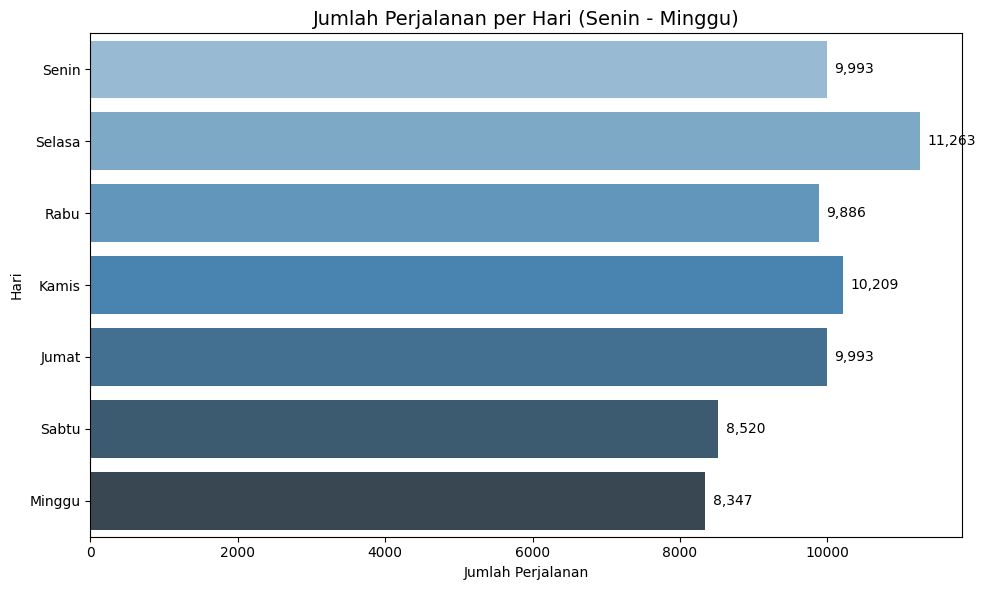

In [191]:
# Hitung jumlah trip per hari
trip_per_day = dataset_clean['weekday_name'].value_counts().reindex(order)

# Plot bar horizontal
plt.figure(figsize=(10, 6))
sb.barplot(x=trip_per_day.values, y=trip_per_day.index, palette='Blues_d')

# Tambahkan label angka di ujung bar
for i, value in enumerate(trip_per_day.values):
    plt.text(value + 100, i, f'{value:,}', va='center')  # pakai koma ribuan

# Judul dan label
plt.title('Jumlah Perjalanan per Hari (Senin - Minggu)', fontsize=14)
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Hari')
plt.tight_layout()
plt.show()

### Interpretasi

Barplot diatas memberikan insight bahwa:

* Pola perjalanan per hari sebanding dengan pola yang ditunjukkan pada heatmap, dimana skala warna pada heatmap menunjukkan kecenderungan yang lebih tinggi pada hari selasa dibandingkan hari lainnya sebagaimana terlihat pada barplot diatas, jumlah perjalanan di hari Selasa mencapai 11,263. Jumlah perjalanan di akhir pekan lebih rendah dibandingkan pada hari kerja yang mengindikasikan adanya korelasi terhadap waktu operasional di kota tersebut, hari kerja dan sekolah.

# 5. Lokasi Penjemputan Terpopuler

Tujuan: Mengetahui lokasi penjemputan mana yang paling sering menggunakan transportasi taksi di Kota New York.

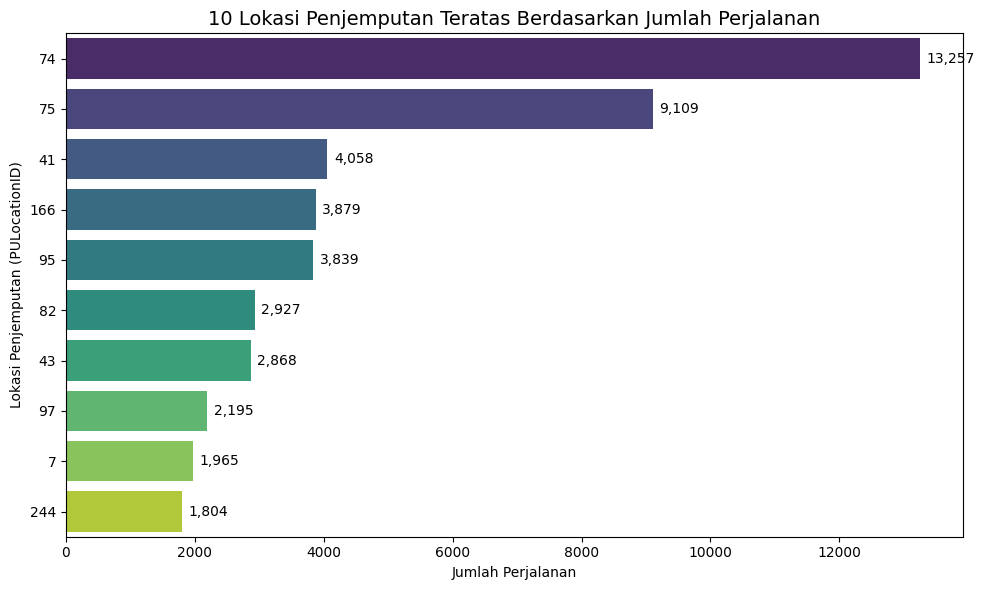

In [195]:
# Hitung jumlah perjalanan per PU Location ID
top_pu = dataset_clean['PULocationID'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sb.barplot(x=top_pu.values, y=top_pu.index.astype(str), palette='viridis')

# Tambahkan label angka
for i, value in enumerate(top_pu.values):
    plt.text(value + 100, i, f'{value:,}', va='center')

# Judul dan label
plt.title('10 Lokasi Penjemputan Teratas Berdasarkan Jumlah Perjalanan', fontsize=14)
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Lokasi Penjemputan (PULocationID)')
plt.tight_layout()
plt.show()


### Interpretasi

Barplot diatas merupakan hubungan antara jumlah perjalanan terhadap lokasi penjemputan, diperoleh:

* Lokasi dengan PULocationID 74 dan 75 merupakan lokasi yang paling banyak digunakan sebagai titik awal penjemputan.
* Kedua lokasi tersebut memiliki perbedaan jumlah perjalanan yang signifikan dengan lokasi setelahnya dalam 10 lokasi teratas yang ditampilkan, menandakan konsentrasi tinggi pada kedua titik tersebut. Hal ini menandakan bahwa lokasi dengan jumlah perjalanan yang tinggi sebagai pusat aktivitas masyarakat seperti pusat kota, kawasan bisnis, stasiun, terminal, atau tempat rekreasi.
* Lokasi-lokasi dengan jumlah perjalanan yang lebih rendah terutama dibawah lokasi penjemputan 10 teratas ini kemungkinan merupakan kawasan pemukiman warga, atau pinggiran kota, dimana aktivitas perjalanan menggunakan taksi sedikit.

# 6. Lokasi Pengantaran Paling Populer

Tujuan: Mengetahui lokasi pengantaran mana yang paling sering menggunakan transportasi taksi di Kota New York.

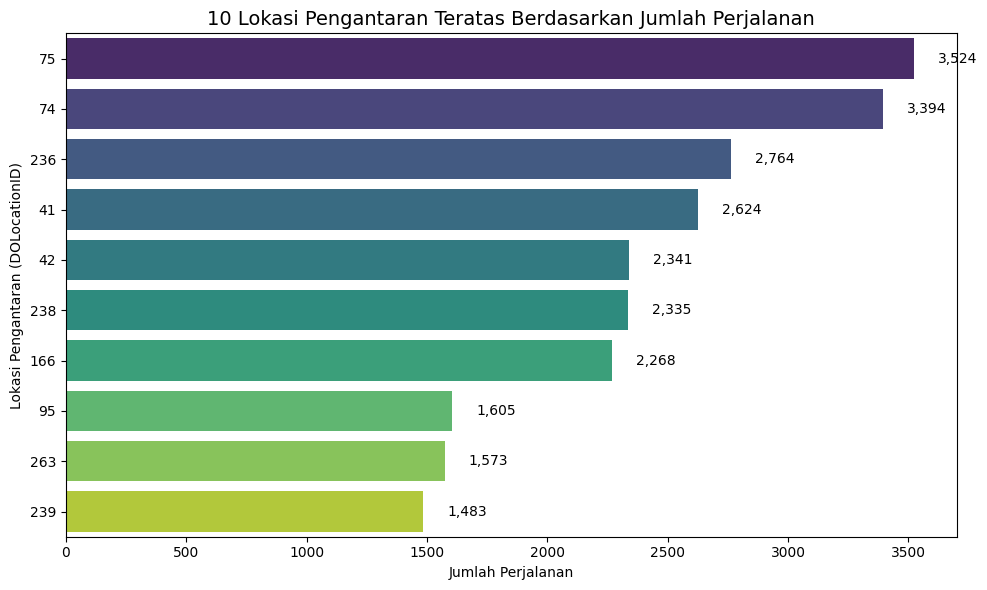

In [196]:
# Hitung jumlah perjalanan per PU Location ID
top_do = dataset_clean['DOLocationID'].value_counts().head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sb.barplot(x=top_do.values, y=top_do.index.astype(str), palette='viridis')

# Tambahkan label angka
for i, value in enumerate(top_do.values):
    plt.text(value + 100, i, f'{value:,}', va='center')

# Judul dan label
plt.title('10 Lokasi Pengantaran Teratas Berdasarkan Jumlah Perjalanan', fontsize=14)
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Lokasi Pengantaran (DOLocationID)')
plt.tight_layout()
plt.show()


### Interpretasi

Barplot diatas merupakan hubungan antara jumlah perjalanan terhadap lokasi penjemputan, diperoleh:

* Sama halnya seperti yang ditunjukkan oleh barplot lokasi penjemputan terpopuler, lokasi pengantaran dengan DOLocationID 74 dan 75 menjadi lokasi yang paling banyak digunakan sebagai titik titik akhir perjalanan.
* Pola yang sama dari kedua barplot ini semakin menunjukkan bahwa kedua lokasi tersebut merupakan pusat aktivitas masyarakat seperti pusat kota, kawasan bisnis, stasiun, terminal, atau tempat rekreasi.
* Lokasi-lokasi dengan jumlah perjalanan yang lebih rendah terutama dibawah lokasi pengantaran 10 teratas ini kemungkinan merupakan kawasan pemukiman warga, atau pinggiran kota, dimana aktivitas perjalanan menggunakan taksi sedikit.
* Lokasi sama yang masuk kedalam kedua lokasi terpopuler adalah 74, 75, 41, 166, dan 95. hal ini menunjukkan adanya rute tetap atau kebiasaan harian, misalnya tempat tinggal ke tempat kerja, stasiun ke area perkantoran dan sebaliknya.
* Lokasi-lokasi tersebut kemungkinan besar berada di area transportasi umum, pusat kota, pusat bisnis, atau pusat pembejalaran.
* Zona dengan jumlah perjalanan tertinggi ini dapat menjadi lokasi populer dengan alokasi operasional taksi prioritas.

# 7. Distribusi Durasi Perjalanan Berdasarkan Lokasi Penjemputan

Tujuan: Mengetahui durasi perjalanan (dalam menit) penumpang dari lokasi penjemputan paling populer

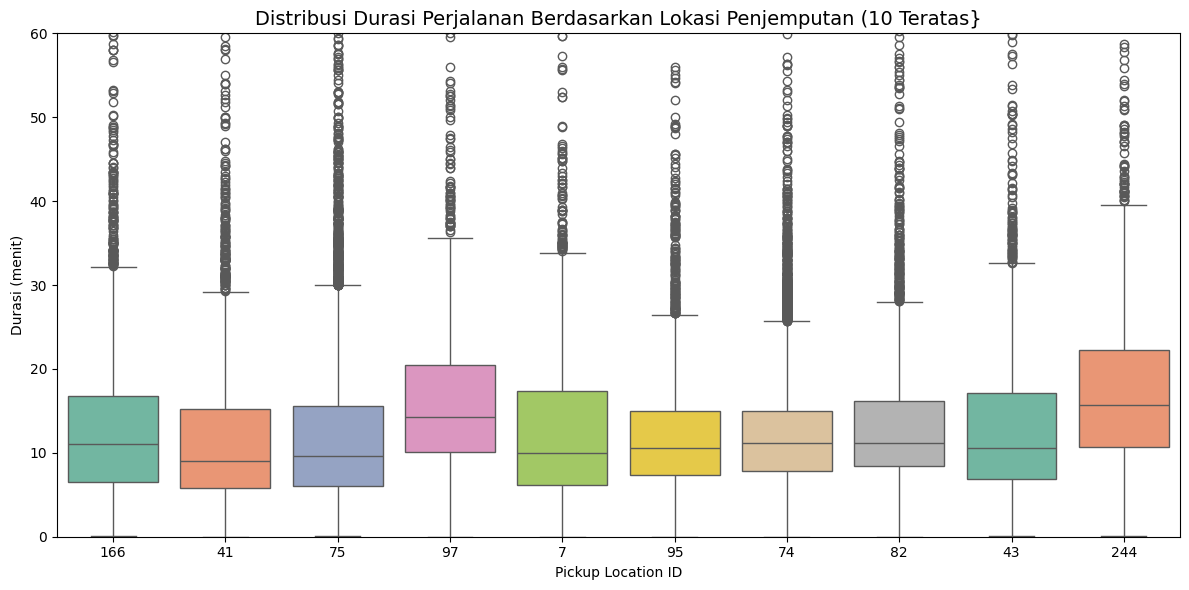

In [200]:
# Hitung durasi perjalanan dalam menit
dataset_clean['duration_min'] = (pd.to_datetime(dataset_clean['lpep_dropoff_datetime']) - pd.to_datetime(dataset_clean['lpep_pickup_datetime'])).dt.total_seconds() / 60

# Ambil 10 lokasi penjemputan terpopuler
top_pu = dataset_clean['PULocationID'].value_counts().head(10).index
filtered_df = dataset_clean[dataset_clean['PULocationID'].isin(top_pu)]

# Konversi ke string supaya label di X-axis rapi
filtered_df['PULocationID'] = filtered_df['PULocationID'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sb.boxplot(
    x='PULocationID',
    y='duration_min',
    data=filtered_df,
    palette='Set2'  # Ganti dengan Set1, Set3, tab10, dll untuk variasi warna
)

plt.title('Distribusi Durasi Perjalanan Berdasarkan Lokasi Penjemputan (10 Teratas}', fontsize=14)
plt.xlabel('Pickup Location ID')
plt.ylabel('Durasi (menit)')
plt.ylim(0, 60)  # Untuk hilangkan outlier ekstrem
plt.tight_layout()
plt.show()

### Interpretasi

Informasi yang diperoleh dari boxplot diatas yakni:

* PULocationID 244 memiliki durasi median tertinggi (dalam menit) dan rentang kuartil (IQR) yang luas, menunjukkan perjalanan dari titik ini cenderung memakan waktu yang lebih lama dan tidak stabil, bisa jadi karena sering terjadi kemacetan atau jauh dari pusat kota. Apabila dikorelasikan dengan lokasi penjemputan terpopuler sebelumnya, lokasi ini masuk kedalam 10 lokasi teratas sebagai lokasi penjemputan terpopuler, bisa jadi lokasi ini merupakan pemukiman warga yang cukup padat namun lebih jauh dari pusat kota.
* Sebaliknya, PULocation ID 75 dan 41 menunjukkan durasi perjalanan yang lebih pendek dan stabil dengan median di bawah 10 menit.
* Hampir semua lokasi memiliki outlier signifikan (bulatan diatas), artinya ada banyak perjalan jauh yang membutuhkan waktu lebih lama dari normal, kemungkinan dapat berasal dari beberapa faktor seperti kemacetan, rute memutar, atau yang lainnya.


# 8. Disribusi Metode Pembayaran Berdasarkan Perjalanan Taksi (Persentase)

Tujuan: Mengetahui persentase metode pembayaran yang paling populer dan paling jarang digunakan sesuai perjalanan taksi.

* Mapping ulang data jenis pembayaran

In [225]:
payment_mapping = {
    'Credit Card': 'Credit Card',
    'Cash': 'Cash',
    'No Charge': 'No charge',
    'Dispute': 'Dispute',
    'Unknown': 'Unknown'
}

dataset_clean['payment_type_rev'] = dataset_clean['payment_type'].map(payment_mapping)


* Mengecek data setelah mapping

In [242]:
print(dataset_clean['payment_type_rev'].value_counts(dropna=False))

payment_type_rev
Credit Card    40686
Cash           22632
NaN             4324
No charge        472
Dispute           95
Unknown            2
Name: count, dtype: int64


* Plotting data sebagai Pie Chart

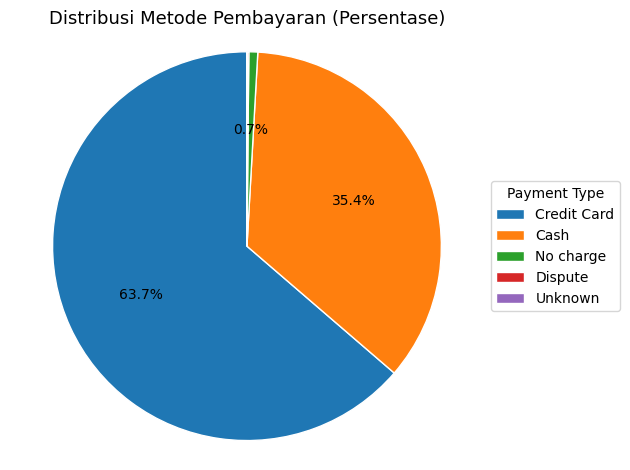

In [245]:
# Hitung proporsi
payment_counts = dataset_clean['payment_type_rev'].value_counts()
payment_percent = payment_counts / payment_counts.sum() * 100

def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 0.5 else ''  # hanya tampilkan >1%

fig, ax = plt.subplots()
wedges, texts, autotexts = plt.pie(
    payment_percent.values,
    labels=None,  # label manual lewat legend
    autopct=autopct_format,
    startangle=90,
    wedgeprops=dict(edgecolor='white'),
    textprops={'fontsize': 10}
)

# Tambahkan legend untuk semua kategori
ax.legend(wedges,
          payment_percent.index,
          title="Payment Type",
          loc="center left",
          bbox_to_anchor=(1, 0.5))

plt.title("Distribusi Metode Pembayaran (Persentase)", fontsize=13)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Interpretasi

Persentase proporsi metode pembayaran layanan taksi diatas mengasumsikan bahwa:

* Metode pembayaran yang paling sering digunakan adalah menggunakan kartu kredit dengan proporsi sebesar 63.7%, disusul oleh pembayaran tunai dengan persentase 35.4%. Persentase pembayaran non-tunai yang tinggi menunjukkan bahwa warga Kota New York mayoritas telah menggunakan teknologi pembayaran digital yang lebih praktis dan aman. Namun metode pembayaran tunai juga masih tinggi yang memperlihatkan sebagian penumpang masih nyaman menggunakan pembayaran tunai atau mungkin belum memiliki akses kartu. Tingginya pembayaran tunai ini juga mengharuskan layanan penyedia jasa taksi ini harus mempertimbangkan penyediaan uang kembalian tunai pula.
* Perjalanan tidak dikenakan biaya mempunyai proporsi 0.74%. Hal ini dapat disebabkan oleh beberapa faktor atau kondisi, seperti adanya promosi, kesalahan perekaman data dalam sistem, atau driver tidak mengenakan biaya karena alasan tertentu.
* Terdapat pula 'dispute' yang mengindikasi pembayaran yang dibantah karena penumpang mempermasalahkan biaya atau gagal transaksi. 'Dispute' ini dapat menunjukkan adanya indikasi error, ketidaksesuaian tagihan, tidak ada perjalanan tapi tercatat atau indikasi fraud. 

# 9. Hubungan Jarak Tempuh Terhadap Total Pembayaran

Tujuan: Mengetahui apakah biaya yang harus dibayarkan oleh penumpang sebanding dengan jarak yang ditempuh.

* Filtering data dari outlier

In [330]:
df_filtered_payment = dataset_clean[(dataset_clean['trip_distance'] > 0) & (dataset_clean['trip_distance'] < 30) &
                 (dataset_clean['total_amount'] > 0) & (dataset_clean['total_amount'] < 150)]


* Menghitung nilai regresi & korelasi

In [ ]:
x = df_filtered_payment['trip_distance']
y = df_filtered_payment['total_amount']

# Regresi linear
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# R^2
r_squared = r_value ** 2


* Plot distribusi jarak tempuh terhadap total pembayaran

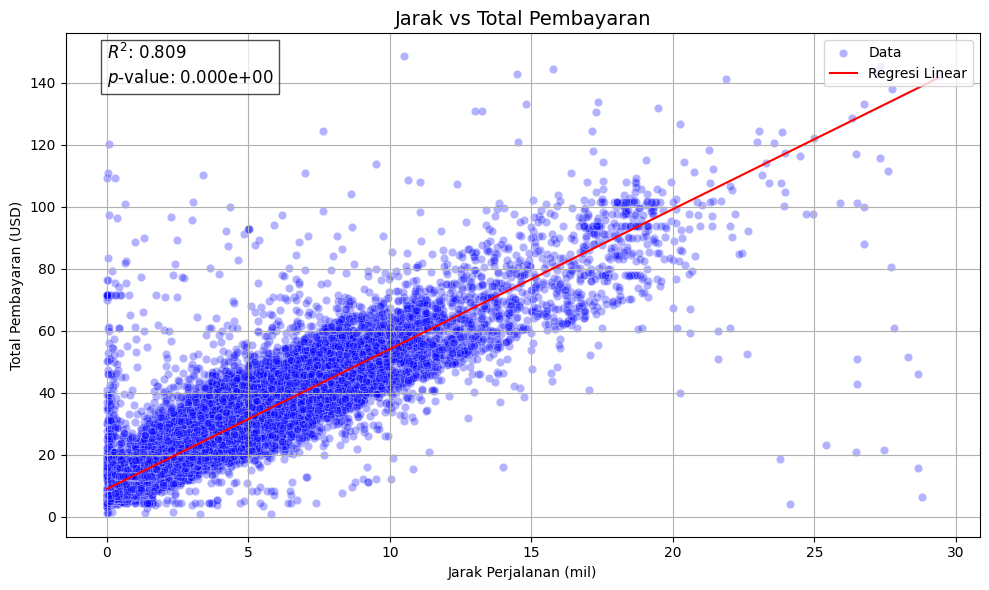

In [333]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=x, y=y, alpha=0.3, label='Data', color='blue')

# Garis regresi
x_values = np.linspace(x.min(), x.max(), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label='Regresi Linear')

# Teks statistik
plt.text(0, 140, f'$R^2$: {r_squared:.3f}\n$p$-value: {p_value:.3e}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Judul & label
plt.title('Jarak vs Total Pembayaran', fontsize=14)
plt.xlabel('Jarak Perjalanan (mil)')
plt.ylabel('Total Pembayaran (USD)')
plt.legend(loc= 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretasi

* Trendline menunjukkan hubungan linier bernilai positif antara jarak (mil) dan total pembayaran (USD) dengan kata lain hubungan bberbanding lurus, semakin jauh perjalanan semakin tinggi pula biaya yang dikenakan, dan sebaliknya.
* Tingkat korelasi yang tinggi ditunjukkan oleh nilai koefisien determinasi yang tinggi mendekati 1, menyatakan hubungan yang kuat antar kedua parameter. 
* p-value yang kecil (p-value < 0.05) menunjukkan hubungan signifikan secara statistik antara jarak dan pembayaran.
* Meskipun plot ini memberikan nilai korelasi yang tinggi, namun masih terlihat adanya outlier. Outlier atau sebaran data yang berada dilyar jangkauan data dapat mengindikasikan adanya anomali seperti perjalanan pendek tapi biaya tinggi (bisa jadi karena adanya biaya tambahamn seperti tarif tol, kemacetan, dll) atau perjalanan panjang tapi biaya relatif rendah (bisa jadi ada promosi atau kesalahan perekaman data oleh sistem).



# 10. Hubungan Jarak Tempuh Terhadap Perilaku Tip

Tujuan: Mengetahui apakah besarnya tip yang diberikan penumpang kepada driver sebanding dengan jarak tempuhnya.

* Filtering data 

In [319]:
df_filtered = dataset_clean[(dataset_clean['trip_distance'] > 0) & (dataset_clean['trip_distance'] < 30) &
                 (dataset_clean['tip_amount'] > 0) & (dataset_clean['tip_amount'] < 50)]


* Menghitung nilai regresi & korelasi

In [320]:
x = df_filtered['trip_distance']
y = df_filtered['tip_amount']

# Regresi linear
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# R^2
r_squared = r_value ** 2


* Plot hubungan jarak tempuh terhadap tip

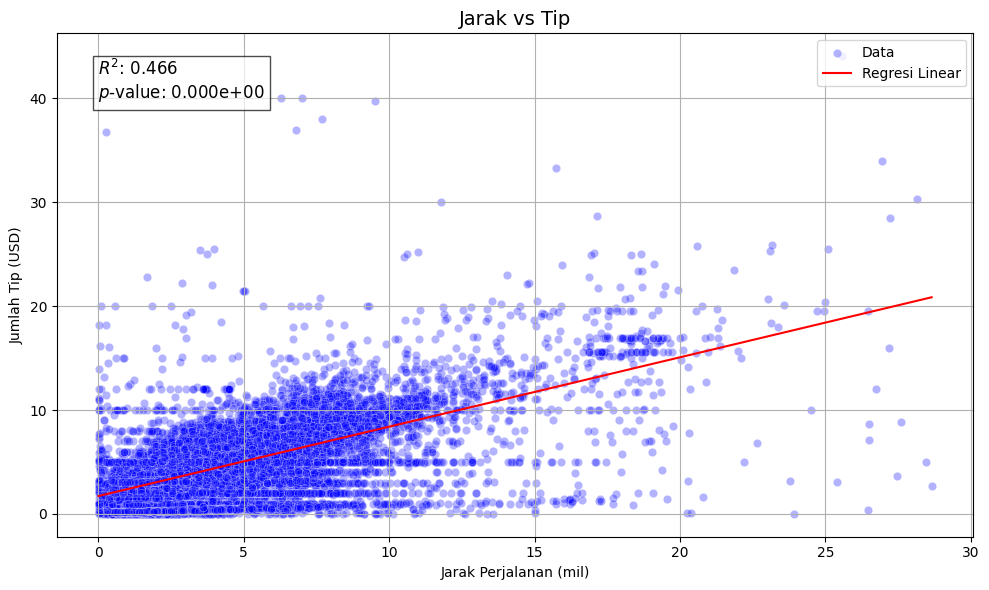

In [325]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=x, y=y, alpha=0.3, label='Data', color='blue')

# Garis regresi
x_values = np.linspace(x.min(), x.max(), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label='Regresi Linear')

# Teks statistik
plt.text(0, 40, f'$R^2$: {r_squared:.3f}\n$p$-value: {p_value:.3e}', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Judul & label
plt.title('Jarak vs Tip', fontsize=14)
plt.xlabel('Jarak Perjalanan (mil)')
plt.ylabel('Jumlah Tip (USD)')
plt.legend(loc= 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretasi

* Trendline menunjukkan hubungan linier bernilai positif antara jarak (mil) dan total pembayaran (USD) dengan kata lain hubungan bberbanding lurus, semakin jauh perjalanan semakin tinggi pula biaya yang dikenakan, dan sebaliknya.
* Namun tingkat korelasi yang ditunjukkan oleh nilai koefisien determinasi hanya bernilai 0.466 termasuk hubungan moderat antar dua parameter yang digunakan. Korelasi moderat ini mengindikasikan ada faktor lain yang juga memberi pengaruh signifikan terhadap tip yang diberikan, misalnya sikap pengemudi dalam melayani penumpang, metode pembayaran, atau lama waktu tempuh yang ujungnya adalah menyangkut tingkat kepuasan penumpang terhadap layanan taksi. 
* p-value yang kecil (p-value < 0.05) menunjukkan hubungan signifikan secara statistik antara jarak dan pembayaran.
* Outlier atau sebaran data yang berada dilyar jangkauan data dapat mengindikasikan adanya anomali seperti perjalanan pendek tapi tip tinggi (bisa jadi karena adanya tingkat kepuasan penumpang tinggi) atau perjalanan panjang tapi tip relatif rendah.

# 11. Anomali: Apakah makin jauh jarak tempuh biaya & tip yang diberikan makin tinggi?

Tujuan: Mengetahui adanya anomali biaya tinggi namun jarak tempuh pendek atau jarak tempuh jauh namun tidak ada tip

In [ ]:
def classify_anomaly(row):
    if row['trip_distance'] < 0.5 and row['total_amount'] > 100:
        return 'Dekat & Mahal'
    elif row['trip_distance'] > 15 and row['tip_amount'] == 0:
        return 'Jauh & Tanpa Tip'
    else:
        return 'Normal'

dataset_clean['anomaly'] = dataset_clean.apply(classify_anomaly, axis=1)


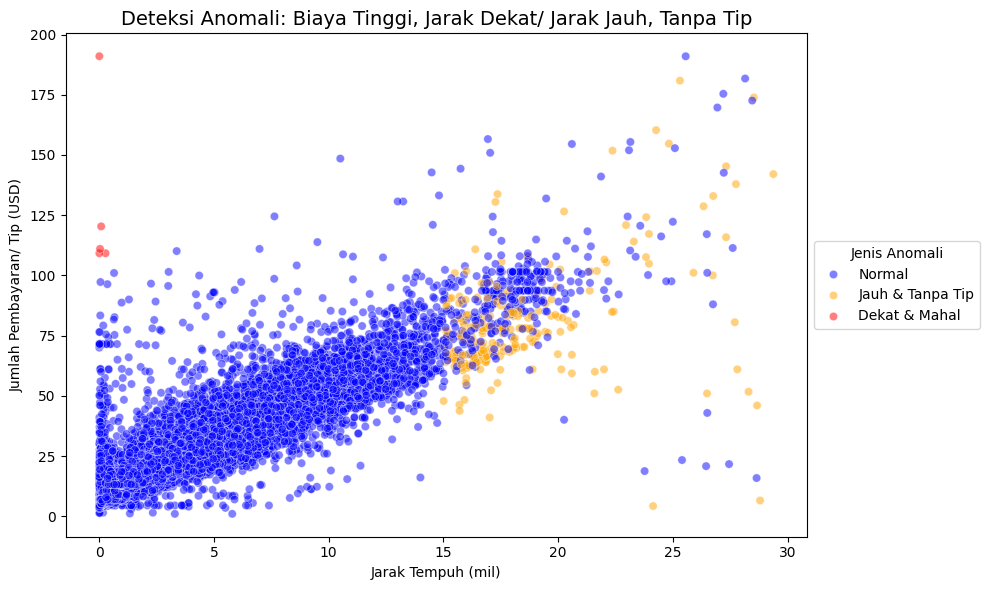

In [345]:
# Filter data agar tidak ada outlier ekstrem
df_plot = dataset_clean[(dataset_clean['trip_distance'] > 0) & (dataset_clean['trip_distance'] < 30) &
             (dataset_clean['total_amount'] > 0) & (dataset_clean['total_amount'] < 200)]

plt.figure(figsize=(10, 6))
sb.scatterplot(data=df_plot,
                x='trip_distance',
                y='total_amount',
                hue='anomaly',
                palette={'Normal': 'blue', 'Dekat & Mahal': 'red', 'Jauh & Tanpa Tip': 'orange'},
                alpha=0.5)

plt.title('Deteksi Anomali: Biaya Tinggi, Jarak Dekat/ Jarak Jauh, Tanpa Tip', fontsize=14)
plt.xlabel('Jarak Tempuh (mil)')
plt.ylabel('Jumlah Pembayaran/ Tip (USD)')
plt.legend(title='Jenis Anomali', bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()


### Interpretasi

* Titik merah yang menandakan outlier untuk biaya tinggi tapi jarak dekat (jarak < 0.5 mil tapi biaya pembayaran > 100 USD) merupakan data yang tidak wajar, bisa jadi dari kesalahan input atau indikasi fraud.
* Titik oranye yang menandakan outlier dari jarak jauh tapi tidak ada tip memiliki persebaran yang cukup banyak, menunjukkan penumpang cenderung enggan memberi tip karena jarak tempuh yang jauh (dengan anggapan mungkin penumpang kuatir harus memberi tip yang besar sesuai dengan jarak tempuh) atau karena tingkat kepuasan penumpang rendah.
* Mayoritas data terdistribusi normal yang direpresentasikan oleh titik biru, semakin jauh jaraknya semakin tinggi biaya dan tipnya.

# Kesimpulan dan Saran

### Kesimpulan

Berdasarkan hasil analisis dari plot data sebagaimana telah dijabarkan diatas, dapat ditarik beberapa kesimpulan sebagai berikut:
1. Hasil yang ditunjukkan oleh plot line jumlah trip per jam, heatmap jumlah trip per hari dan jam, dan barplot jumlah perjalanan perhari menyatakan jumlah perjalanan tertinggi adalah pada pagi hari - sore hari terutama di hari kerja, dan puncaknya di sore hari mulai dari pukul 15.00 - 18.00. Tingginya jumlah penggunaan transportasi taksi ini berada pada pagi hari dimana merupakan jam berangkat kerja, sekolah, atau aktivitas lain dan sore hari adalah waktu pulang sekolah dan kerja. Pola perjalanan berhubungan dengan aktivitas masyarakat di Kota New York. 
Pada akhir pekan pola sedikit berbeda dimana pada siang - sore tingkat mobilitas masyarakat tidak setinggi pada hari kerja, sedangkan di tengah malam - dini hari mobilitas sedikit lebih tinggi dibanding hari kerja, menandakan adanya aktivitas liburan atau sosial lainnya. hal ini dipertegas oleh banyaknya rata-rata penumpang pada akhir pekan khususnya di sore - dini hari (aktivitas liburan lebih banyak dilakukan secara berkelompok atau lebih dari satu orang).
2. Lokasi pengantaran dan penjemputan yang paling sering digunakan mengindikasikan lokasi dari pusat kota, pusat bisnis, pusat pembelajaran, stasiun, atau transportasi massal lainnya. Sebaliknya, lokasi pengantaran atau penjemputan yang jarang digunakan diasumsikan area pemukiman warga yang tidak terlalu padat atau pinggiran kota yang lebih jarang menggunakan layanan transportasi taksi. Lokasi sama yang masuk kedalam kedua lokasi terpopuler adalah 74, 75, 41, 166, dan 95. Hal ini menunjukkan adanya rute tetap atau kebiasaan harian, misalnya tempat tinggal ke tempat kerja, stasiun ke area perkantoran dan sebaliknya.
PULocationID 244 memiliki durasi median tertinggi (dalam menit) dan rentang kuartil (IQR) yang luas, menunjukkan perjalanan dari titik ini cenderung memakan waktu yang lebih lama dan tidak stabil, bisa jadi karena sering terjadi kemacetan atau jauh dari pusat kota. Apabila dikorelasikan dengan lokasi penjemputan terpopuler sebelumnya, lokasi ini masuk kedalam 10 lokasi teratas sebagai lokasi penjemputan terpopuler namun diurutan terakhir, bisa jadi lokasi ini merupakan pemukiman warga yang cukup padat namun lebih jauh dari pusat kota. Sebaliknya, PULocation ID 75 dan 41 menunjukkan durasi perjalanan yang lebih pendek dan stabil dengan median di bawah 10 menit, dimana kedua lokasi ini juga menempati urutan baik lokasi penjemputan maupun pengantaran paling atas. 
Sehingga, lokasi populer berhubungan terhadap pusat aktivitas masyarakat, durasi, dan jarak tempuh.
3. Trendline menunjukkan hubungan linier positif yang kuat antara jarak tempuh terhadap biaya yang menunjukkan korelasi yang kuat ditunjukkan oleh nilai korelasi deterministik yang tinggi yaitu 0.809 atau keakuratan kebeneran datanya sebesar 81%. Berbeda dengan hubungan antara jarak tempuh terhadap tip, dimana hanya menunjukkan korelasi moderat yang mengindikasikan adanya faktor lain terhadap pemberian tip selain faktor jarak, seperti tingkat kepuasaan penumpang terhadap pelayanan driver, durasi perjalanan, dll. 
Pada kedua scatter plot tersebut terdapat outlier. Outlier pada kedua plot ini kemudian diperjelas pada scatter plot untuk mengidentifikasi sebaran anomali terhadap data normal. Terdapat anomali dimana jarak perjalanan dekat namun biaya yang dikenakan tinggi, bisa berasal dari kesalahan perekaman sistem atau indikasi fraud (perlu diidentifikasi lebih lanjut), selain itu muncul anomali berupa jarak tempuh jauh namun tidak ada tip, diasumsikan karena kepuasaan penumpang rendah.
Metode pembayaran juga bisa dihubungkan terhadap jarak tempuh. Pembayaran kartu kredit dengan proporsi paling tinggi umumnya digunakan untuke perjalanan jarak tempuh lebih jauh dan biaya lebih tinggi dan lebih sering disertai tip. Pembayaran tunai lebih dominan pada perjalanan pendek atau dengan biaya yang rendah hingga menengah, begitupula dengan pemberian tip. Tidak dipungut biaya bisa berasal dari promosi, kesalahan sistem, dana lainnya. Dispute terjadi saat penumpang tidak setuju dengan biaya dan menolak membayar indikasi adanya kesalahan pencatatn, konflik tarif, atau ketidakpuasan pelayanan.

### Saran

Berdasarkan kesimpulan hasil analisis data perjalanan taksi Kota New York, berikut adalah saran atau rekomendasi yang bisa diberikan untuk berbagai pihak terkait seperti operator taksi, otoritas transportasi, atau pemegang kebijakan kota:
1. Peningkatan jumlah taksi pada jam sibuk (6.00 - 10.00 & 15.00 - 18.00), terutama di hari kerja untuk menghindari kelangkaan kendaraan. Pada akhir pekan perlu disiapkan lebih banyak taksi pada saat malam - dini hari, karena ada lonjakan aktivitas sosial dan hiburan.
Penerapan tarif yang fleksibel disesuaikan dengan waktu dan lokasi untuk meningkatkan permintaan dan pendapatan. Pemberian diskon diluar jam sibuk juga dapat dilakukan untuk memaksimalkan kegunaan taksi.
2. Identifikasi lokasi dengan durasi panjang dan IQR besar kemudian dievaluasi kemungkinan penyebabnya seperti kemacetan, kondisi jalan, atau area tertentu.
3. Perilaku tip yang tidak bergantung jarak ini mengisyaratkan perlunya evaluasi terhadap kualiatas pelayanan pengemudi terutama dalam sopan santun, keamana, dan kebersihan. Edukasi terhadap pembaerian tip dan metode pembayaran juga bisa dilakukan terutama bagi pengguna pembayaran non-tunai. Pembayaran tunai atau dispute lebih rawan terhadap manipulasi dan tidak ada kontrol sistem, sehingga perlu adanya evaluasi terhadap penetapan tarif dan transparansi bagi penumpang. 